<a href="https://colab.research.google.com/github/2-BrainCells/Churn_Prediction/blob/master/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# # drive.mount('https://drive.google.com/file/d/1Pxyxp1w3h9Lio_sGlDie2ce6BghvtGJM/view?usp=drive_link')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn import svm

In [ ]:
df = pd.read_csv("/content/Churn-Data.csv")
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [ ]:
df.shape

(5634, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,Charges_Month
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


In [ ]:
df.isnull().describe()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,...,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,...,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634


In [ ]:
X = df.drop('Churn', axis=1)
X = pd.get_dummies(X)
y = df['Churn']
y = np.ravel(y)

Text(0.5, 1.0, 'Gender vs Churn')

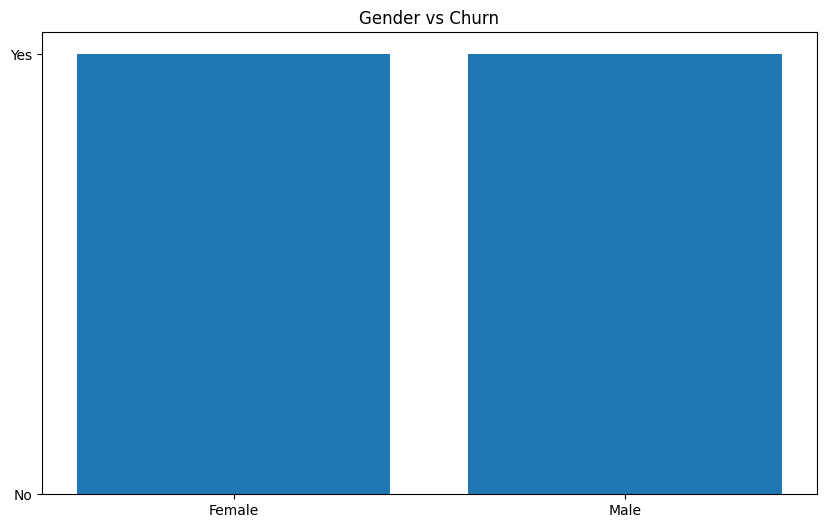

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['gender'], df['Churn'])
plt.title("Gender vs Churn")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(4507, 4507, 1127, 1127)

In [ ]:
model_0 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model_0.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_preds = model_0.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_preds)
f1_yes = f1_score(y_test, y_preds, pos_label='Yes')
f1_no = f1_score(y_test, y_preds, pos_label = 'No')
print(f'Accuracy :{accuracy}')
f1 = (f1_yes + f1_no) / 2
print(f'F1: {f1}')

Accuracy :0.7879325643300799
F1: 0.6967445578441913


In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# model_1 = svm.SVC()

In [ ]:
# model_1.fit(X_train_scaled, y_train)

In [ ]:
# y_preds = model_1.predict(X_test_scaled)

In [ ]:
# accuracy = accuracy_score(y_test, y_preds)
# f1_yes = f1_score(y_test, y_preds, pos_label='Yes')
# f1_no = f1_score(y_test, y_preds, pos_label = 'No')
# print(f'{accuracy}')
# print(f'{f1_yes, f1_no}')